<a href="https://colab.research.google.com/github/sakshivam/Deep_learning_examples/blob/main/MNIST_Handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Loading the MNIST dataset with 0-9 handwritten digit images

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train length i.e no. of images :",len(X_train))
print("X_test length :",len(X_test))

11490434/11490434 [==============================] - 0s 0us/step
X_train length i.e no. of images : 60000
X_test length : 10000


In [4]:
print("Shape of an image:", X_train[0].shape)

Shape of an image: (28, 28)


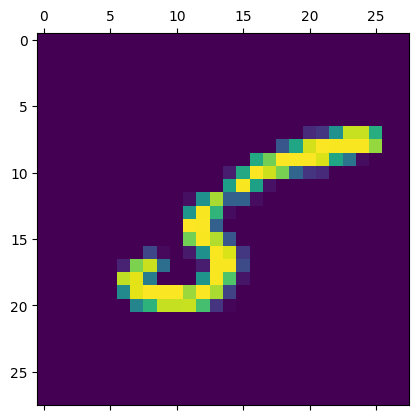

In [5]:
#Now plotting any one image randomly using matplotlib.pyplot
plt.matshow(X_train[11])

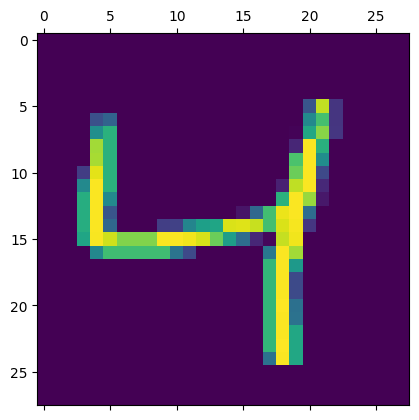

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

## Scaling X_train and X_test

In [8]:
X_train = X_train/255
X_test = X_test/255

## Flattening data

In [9]:
#Flattening an image
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print("Flattened X_train shape: ", X_train_flattened.shape)
print("Flattened X_test shape: ", X_test_flattened.shape)

Flattened X_train shape:  (60000, 784)
Flattened X_test shape:  (10000, 784)


## Building Neural Network

In [10]:
# creating a neural network with one input layer and defining 10 outputs with activation function as sigmoid
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4643 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3032 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2829 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2663 - accuracy: 0.9255


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2685 - accuracy: 0.9260


[0.268462598323822, 0.9259999990463257]

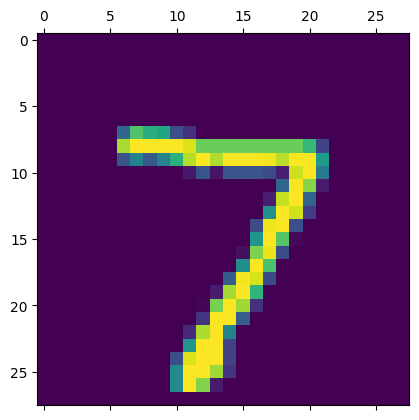

In [12]:
plt.matshow(X_test[0])

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.1171655e-02, 2.8271322e-07, 5.0273653e-02, 9.4906461e-01,
       2.6291071e-03, 1.4126085e-01, 2.0641014e-06, 9.9977142e-01,
       1.0667060e-01, 6.9493169e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [16]:
#Creating ypredicted_labels for y_predicted as it should be same as y_test values to be used in confusion matrix func of tf.math
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])


[7, 2, 1, 0, 4]


## Checking Performance of model

In [17]:
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    5,    5,    2,    2,    0],
       [   0, 1107,    3,    2,    1,    1,    4,    2,   15,    0],
       [   8,    9,  915,   19,   13,    3,   13,   10,   38,    4],
       [   4,    0,   13,  930,    1,   19,    3,    9,   21,   10],
       [   1,    1,    2,    2,  916,    0,   12,    3,    8,   37],
       [   9,    2,    1,   37,   11,  768,   18,    5,   34,    7],
       [  13,    3,    4,    1,    7,   10,  917,    2,    1,    0],
       [   2,    6,   20,    8,    9,    0,    0,  938,    3,   42],
       [   6,    6,    6,   21,    9,   23,   10,    8,  877,    8],
       [  11,    7,    1,   10,   30,    6,    0,   10,    6,  928]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

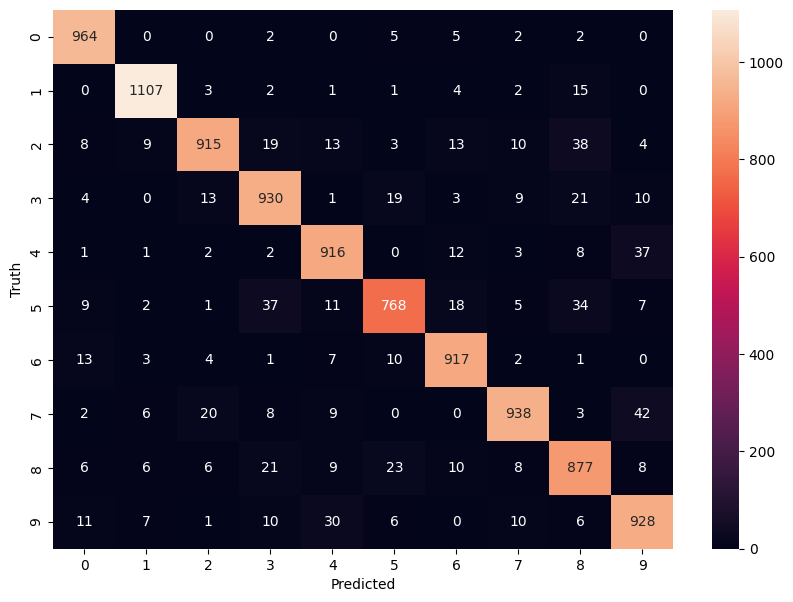

In [19]:
# visualizing this confusion matrix in an appealing manner using seaborn library
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



Here the diagnol represents the number of times a value is predicted correctly. All other values except diagnol represents error. But confusion matrix is a great way to check the performance of the model.

## Adding a hidden layer

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2715 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1244 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0668 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0521 - accuracy: 0.9840


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9755


[0.08420591056346893, 0.9754999876022339]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

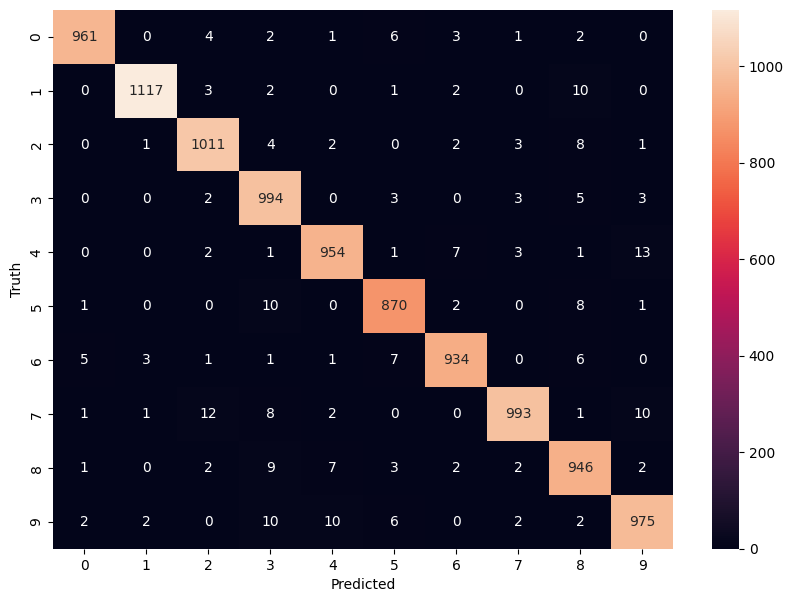

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
#If we do not want to flatten our data. Then we can keras inbuilt keras.layers.Flatten function before applying activation layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2797 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1232 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0860 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0663 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0509 - accuracy: 0.9845
